# Q7

## 1. Import Libraries

In [1]:
from igraph import Graph
import igraph as ig
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import Image
import random

## 2. Load Data

In [2]:
edges = []
# Read the data
with open('../Data_Q7/socialmedia.graph.txt', 'r') as file:
    for line in file.readlines()[2:]:
        node1, node2 = map(int, line.strip().split('\t'))
        edges.append((node1, node2))


In [3]:
# Create graph
g = Graph(edges=edges, directed=False)
g.delete_vertices(0)

## 3. Please calculate and plot the clustering coefficient and degree distribution of the network.

In [4]:
# a. 计算和绘制聚类系数
clustering_coefficient = g.transitivity_undirected()
print("Average Clustering Coefficient:", clustering_coefficient)

Average Clustering Coefficient: 0.006218559818028638


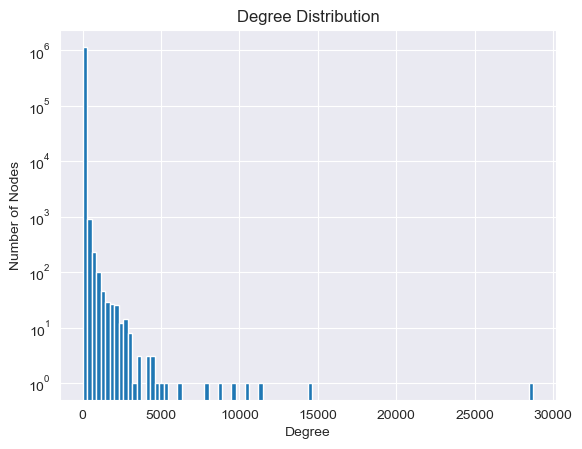

In [5]:
# 绘制度分布的对数直方图
plt.hist(g.degree(), bins=100, log=True)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.show()

## Identify the most influential nodes in a network and analyze them.
Please use centrality metrics such as degree centrality and then
visualize

In [6]:
# Calculate degree centrality for all nodes
degrees = g.degree()

In [7]:
# Identify the most influential nodes
# Choose the number of nodes to display
top_n = 50

# Get the indices of the top n nodes
top_nodes = sorted(range(len(degrees)), key=lambda i: degrees[i], reverse=True)[:top_n]
top_centrality_values = [degrees[i] for i in top_nodes]

# Print the results
print("The most influential nodes:", top_nodes)
print("Their degree centrality:", top_centrality_values)

The most influential nodes: [1071, 362, 35660, 105, 482708, 663930, 928, 807, 27836, 108623, 2686, 663605, 2632, 1845, 479, 831, 1244, 1190, 2525, 663559, 802, 3424, 44005, 115673, 383, 21170, 155431, 4718, 115240, 516, 8745, 110104, 105477, 1431, 280435, 664788, 697671, 3, 772, 103, 209, 310, 20363, 2782, 2538, 27801, 340, 1489, 687, 27543]
Their degree centrality: [28754, 14641, 11281, 10461, 9762, 8843, 7917, 6102, 5393, 4899, 4877, 4422, 4364, 4352, 4253, 4217, 4044, 3707, 3621, 3506, 3394, 3160, 3114, 3100, 3035, 3024, 2992, 2956, 2924, 2866, 2866, 2837, 2830, 2818, 2800, 2799, 2763, 2753, 2742, 2720, 2634, 2628, 2591, 2535, 2504, 2488, 2464, 2444, 2400, 2380]


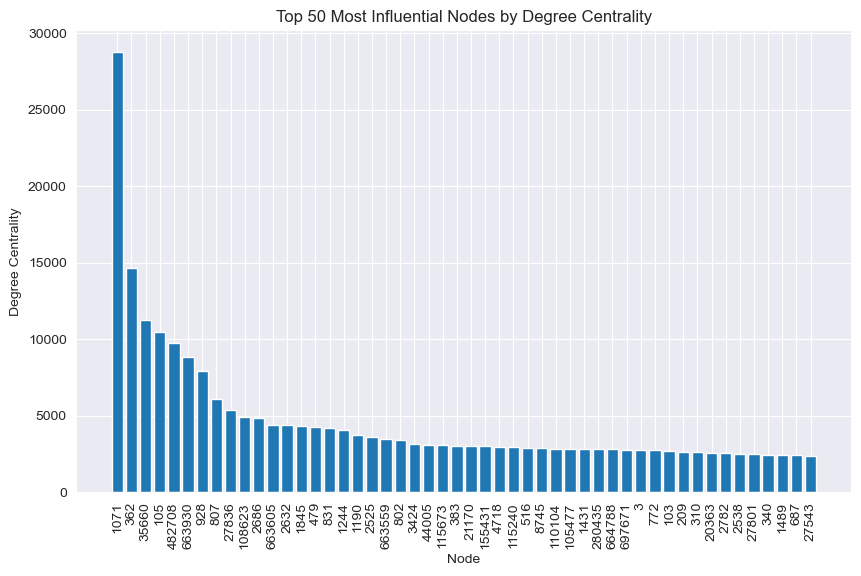

In [8]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), top_centrality_values, tick_label=top_nodes)
plt.title('Top {} Most Influential Nodes by Degree Centrality'.format(top_n))
plt.xlabel('Node')
plt.xticks(rotation=90)
plt.ylabel('Degree Centrality')
plt.show()

In [9]:
# 确定最具影响力的节点
most_influential_node = top_nodes[0]

# 计算该节点的邻居数量
num_neighbors = len(g.neighbors(most_influential_node))
print("Number of neighbors of the most influential node:", num_neighbors)

# 获取邻居节点的度数
neighbor_degrees = g.degree(g.neighbors(most_influential_node))

# 计算邻居节点的平均度数
average_neighbor_degree = sum(neighbor_degrees) / len(neighbor_degrees)
print("Average degree of the neighbors:", average_neighbor_degree)

Number of neighbors of the most influential node: 28754
Average degree of the neighbors: 40.92588857202476


In [10]:
subgraph = g.subgraph([most_influential_node] + g.neighbors(most_influential_node))
ig.plot(subgraph, vertex_label=range(len(subgraph.vs)), vertex_label_size=5, target="../Q7_Image/most_influential_node_full.png")

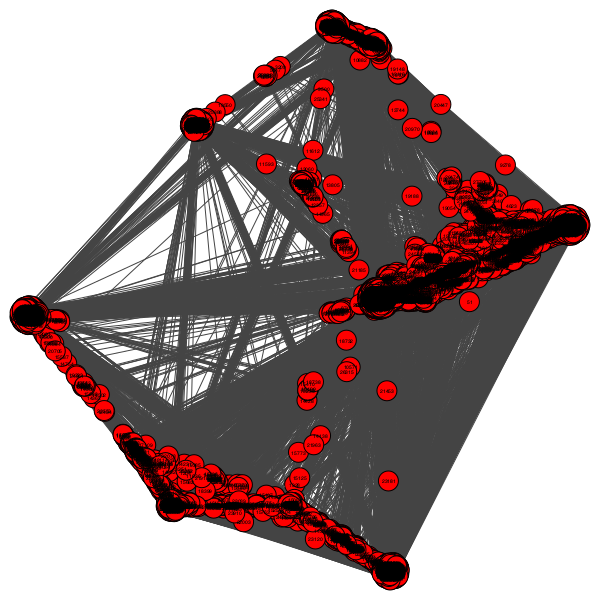

In [10]:
# Show the Image
Image(filename='../Q7_Image/most_influential_node_full.png')

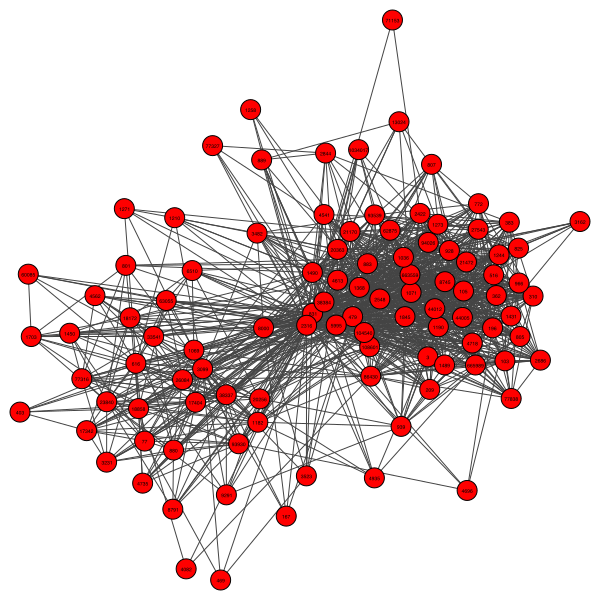

In [11]:
# 选择部分邻居进行可视化
top_k_neighbors = 100
neighbors = g.neighbors(most_influential_node)
neighbors_sorted_by_degree = sorted(neighbors, key=lambda n: g.degree(n), reverse=True)
selected_neighbors = neighbors_sorted_by_degree[:top_k_neighbors]

# 创建子图
subgraph = g.subgraph([most_influential_node] + selected_neighbors)

# 映射原图中的索引到子图中
subgraph_vertex_labels = [g.vs[node].index for node in [most_influential_node] + selected_neighbors]

# 使用原图中的索引作为标签来绘制子图
ig.plot(subgraph, vertex_label=subgraph_vertex_labels, vertex_label_size=5, target="../Q7_Image/most_influential_node_100.png")

## c. Identify Isolated Nodes in the Network

In [13]:
# Identify the isolated nodes
isolated_nodes = [node for node, degree in enumerate(degrees) if degree == 0]

Number of Isolated Nodes: 22937
50 of them: [635473, 635474, 635475, 635476, 635477, 635478, 635479, 635480, 635481, 635482, 635483, 635484, 635485, 635488, 635489, 635490, 635491, 635493, 635494, 635495, 635496, 635498, 635499, 635501, 635502, 635503, 635505, 635506, 635512, 635513, 635514, 635515, 635517, 635518, 635519, 635520, 635521, 635522, 635523, 635524, 635525, 635527, 635528, 635529, 635531, 635532, 635533, 635534, 635535, 635536]


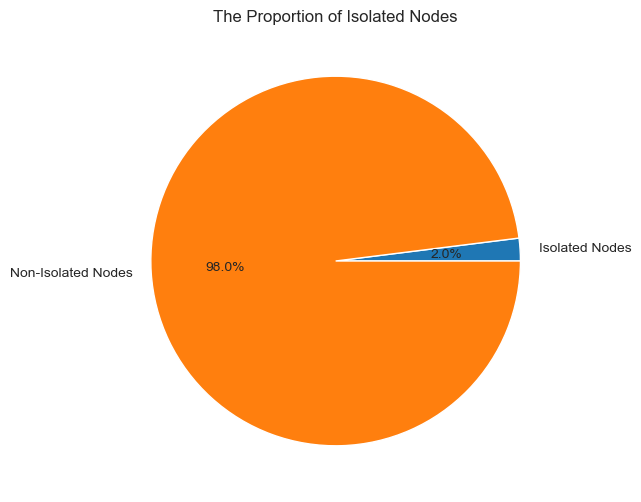

In [14]:
# Print the number of isolated nodes and show 50 of them
num_isolated_nodes = len(isolated_nodes)
print("Number of Isolated Nodes:", num_isolated_nodes)
print("50 of them:", isolated_nodes[:50])

plt.figure(figsize=(6, 6))
plt.pie([num_isolated_nodes, len(degrees) - num_isolated_nodes], labels=['Isolated Nodes', 'Non-Isolated Nodes'], autopct='%1.1f%%')
plt.title('The Proportion of Isolated Nodes')
plt.show()

## d. Recognize Connected Components in the Network

In [15]:
# Get the all connected components
connected_components = g.connected_components()

In [16]:
# Get the sizes of all connected components
num_components = len(connected_components)
print("The number of connected components:", num_components)

# Number of components with size > 1
num_nontrivial_components = sum([1 for component in connected_components if len(component) > 1])
print("The number of nontrivial connected components:", num_nontrivial_components)

# The size of the largest component
component_sizes = connected_components.sizes()
largest_component_size = max(component_sizes)
print("The size of the largest component:", largest_component_size)

The number of connected components: 22938
The number of nontrivial connected components: 1
The size of the largest component: 1134890


## e. Compute Average Shortest Path Length of the Network.
## f. Calculate the Diameter of the Network


In [ ]:
# Since only one component has size > 1, we can get the largest component by using the giant() method
largest_component = g.connected_components().giant()

In [ ]:
# # Calculate the average shortest path length
# avg_shortest_path_length = largest_component.average_path_length()
# print("The average shortest path length:", avg_shortest_path_length)
# 
# # Calculate the diameter
# diameter = largest_component.diameter()
# print("The diameter:", diameter)

Due to the large size of the original dataset, it takes a long time to calculate the average shortest path length and diameter.
Therefore, we will use a sampled dataset to calculate these metrics.

In [17]:
# set the seed
random.seed(50015940)

# Set the sampling ratio
sampling_ratio = 0.1

# Choose a subset of edges from the original dataset randomly
sampled_edges = random.sample(edges, int(len(edges) * sampling_ratio))

In [18]:
# Create a sampled graph
sampled_graph = Graph(sampled_edges, directed=False)

# Get the connected components from the sampled graph
sample_connected_components = sampled_graph.connected_components()

# Get the largest component from the sampled graph
largest_component_sampled = sample_connected_components.giant()

In [ ]:
# Calculate the average shortest path length of the sampled graph
sample_avg_shortest_path_length = largest_component_sampled.average_path_length()
print("The average shortest path length:", sample_avg_shortest_path_length)

In [ ]:
# Calculate the diameter of the sampled graph
sample_diameter = largest_component_sampled.diameter()
print("The diameter:", sample_diameter)

# g. Detect Community Structures in the Network. Please employ
community detection algorithms (e.g., Louvain algorithm) to find
community structures within the network. Please analyze the detection
results, including factors such as the number of communities and
statistics within the community. Assess the impact of relevant
parameters(if any). Try your best to visualize the detection results.

In [4]:
# community_multilevel
communities = g.community_multilevel()

In [5]:
# Number of communities
num_communities = len(communities)
print("Number of communities detected:", num_communities)

# Size of each community
community_sizes = communities.sizes()
print("Sizes of each community:", community_sizes)

# Average size of communities
avg_community_size = sum(community_sizes) / num_communities
print("Average size of communities:", avg_community_size)

Number of communities detected: 29763
Sizes of each community: [187051, 144344, 12639, 1912, 23474, 99766, 43545, 98092, 2674, 12050, 48728, 42601, 8754, 14, 14951, 2478, 2932, 4, 6, 3207, 10516, 8502, 4923, 7, 37817, 5, 1139, 16390, 3273, 4665, 12265, 3378, 18496, 10540, 2217, 16548, 7711, 4707, 4, 25013, 2600, 1979, 5, 8, 1108, 921, 4052, 1937, 16669, 7054, 1265, 2399, 1782, 2416, 2494, 4410, 5885, 1673, 2406, 4447, 36763, 4, 1656, 1417, 1805, 3800, 1756, 1372, 1050, 2642, 2552, 8, 7, 87, 7, 6, 23, 5, 2480, 2013, 8, 1333, 1112, 7, 766, 1057, 6, 4, 9, 805, 5, 1404, 2086, 12, 1114, 8, 4, 6, 365, 7, 1273, 1362, 12, 1101, 9, 1533, 9, 6, 3, 8, 45, 1210, 4, 6, 5, 9, 16, 9, 7, 10, 5, 5, 946, 7, 18, 4, 7, 14, 20, 5, 13, 12, 10, 5, 10, 106, 1227, 4, 6, 12, 4, 31, 7, 4, 7, 4, 14, 16, 4, 4, 5, 8, 4, 20, 10, 7, 30, 7, 12, 13, 4, 3, 14, 5, 4, 6, 7, 27, 12, 4, 40, 21, 79, 7, 413, 46, 26, 369, 8, 13, 8, 112, 1027, 8, 22, 4, 3, 69, 7, 14, 7, 89, 30, 7, 4, 7, 7, 163, 11, 8, 35, 6, 6, 8, 4, 10, 8, 7, 

In [ ]:
# # 选择要可视化的最大社区数量
# top_communities = 10
# 
# # 获取最大的几个社区
# top_community_indices = sorted(range(len(community_sizes)), key=lambda i: community_sizes[i], reverse=True)[:top_communities]
# 
# # 创建一个颜色映射，仅为最大的几个社区分配颜色
# community_colors = ["grey"] * len(communities.membership)  # 默认颜色
# colors = ['red', 'green', 'blue', 'yellow', 'pink', 'orange', 'purple', 'brown', 'grey', 'cyan']
# for i, color in zip(top_community_indices, colors):
#     indices = [index for index, community in enumerate(communities.membership) if community == i]
#     for index in indices:
#         community_colors[index] = color
# 
# # 可视化图形
# ig.plot(g, vertex_color=community_colors)

In [13]:
# # 选择一个社区进行可视化
# community_to_visualize = communities[0]  # 可以选择不同的社区索引
# subgraph = g.subgraph(community_to_visualize)

In [15]:
# # 设置保存路径
# output_file_path = 'my_network_graph.png'
# 
# # 使用简单布局进行可视化
# layout = subgraph.layout_random()
# ig.plot(subgraph, layout=layout, target=output_file_path)

In [10]:
# 筛选出大小在 20 到 100 内的社区
selected_community_indices = [i for i, size in enumerate(community_sizes) if 100 >= size > 20]

In [11]:
selected_community_indices

[73,
 76,
 110,
 141,
 156,
 167,
 170,
 171,
 172,
 175,
 176,
 184,
 187,
 191,
 192,
 200,
 217,
 218,
 236,
 246,
 247,
 249,
 257,
 260,
 261,
 274,
 289,
 310,
 313,
 321,
 325,
 327,
 329,
 331,
 333,
 335,
 344,
 364,
 373,
 379,
 384,
 396,
 411,
 415,
 453,
 462,
 482,
 483,
 484,
 492,
 498,
 517,
 520,
 529,
 542,
 562,
 567,
 595,
 616,
 619,
 642,
 678,
 697,
 714,
 716,
 720,
 733,
 743,
 750,
 753,
 766,
 770,
 785,
 800,
 814,
 817,
 850,
 853,
 863,
 888,
 890,
 893,
 929,
 977,
 982,
 992,
 996,
 1109,
 1122,
 1132,
 1133,
 1137,
 1154,
 1155,
 1162,
 1169,
 1178,
 1204,
 1226,
 1242,
 1260,
 1264,
 1280,
 1309,
 1313,
 1357,
 1372,
 1373,
 1394,
 1427,
 1430,
 1435,
 1442,
 1453,
 1456,
 1470,
 1475,
 1483,
 1499,
 1501,
 1531,
 1535,
 1536,
 1569,
 1593,
 1627,
 1631,
 1639,
 1678,
 1694,
 1752,
 1759,
 1778,
 1873,
 1881,
 2045,
 2060,
 2076,
 2107,
 2170,
 2175,
 2200,
 2221,
 2257,
 2264,
 2290,
 2301,
 2337,
 2340,
 2371,
 2392,
 2409,
 2410,
 2437,
 2531,
 260

In [12]:
# 收集这些社区中的所有顶点
vertices_to_include = []
for community_index in selected_community_indices:
    vertices_to_include.extend(communities[community_index])

In [15]:
# 创建一个子图，只包含选定的社区
subgraph = g.subgraph(vertices_to_include)

# 为子图中的每个社区分配颜色
# 扩展颜色列表以适应更多社区（如果需要）
colors = ['red', 'green', 'blue', 'yellow', 'pink', 'orange', 'purple', 'brown', 'grey', 'cyan']
extended_colors = colors * (len(selected_community_indices) // len(colors) + 1)

subgraph_community_colors = [extended_colors[communities.membership[v]] for v in vertices_to_include if v in communities.membership]
output_file_path = 'my_network_graph.png'
# 可视化子图
ig.plot(subgraph, vertex_color=subgraph_community_colors, target=output_file_path)
